In [1]:
import os

In [2]:
os.getcwd()  # 현재 경로 확인하기


'D:\\ML'

In [3]:
new_path = os.path.join(os.getcwd(),'data')
new_path

'D:\\ML\\data'

In [4]:
import glob

In [5]:
# 해다 경로에 있는 모든 파일들의 리스트를 만드는 명령어
glob.glob(new_path+"/*")

['D:\\ML\\data\\Error Lot list.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.06.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.07.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.08.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.09.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.10.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.13.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.14.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.15.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.16.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.17.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.23.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.24.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.27.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.28.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.29.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.30.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.10.01.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.10.05.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.10.06.csv',
 'D:\\ML\\data\\kemp-abh-sensor-

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# index 데이터 수집시 자동으로 부여되는 시퀀스한 값
# Process : process 추적을 위해 동일 process에 동일 숫자를 부여
# time : 측정 시 시간을 초 단위까지 기록
# Temp : 열풍건조 설비 내 공정 온도 측정 값
# Current :  열품겅조 설비 내 공저 전압 측정 값

sample = 'D:\\ML\\data\\kemp-abh-sensor-2021.09.06.csv'
df = pd.read_csv(sample, index_col=False)
df.head()

,Index,Process,Time,Temp,Current,Date
0,1,1,오후 4:24:03.0,75.139142,1.610,2021-09-06
1,2,1,오후 4:24:08.0,76.660421,1.530,2021-09-06
2,3,1,오후 4:24:13.0,77.177660,1.701,2021-09-06
3,4,1,오후 4:24:18.0,76.586434,1.736,2021-09-06
4,5,1,오후 4:24:23.0,77.877104,1.748,2021-09-06


In [8]:
# 0 : 에러가 발생한 작업단위의 날짜
# 1 ~ 11 : 에러가 발생한 공정의 번호
errorData = 'D:\\ML\\data\\Error Lot list.csv'
df = pd.read_csv(errorData, index_col=False)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,2021-09-06,32.0,33.0,20.0,21.0,22.0,31.0,NaN,NaN,NaN,NaN,NaN
1,2021-09-07,32.0,33.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-09,15.0,16.0,17.0,21.0,22.0,23.0,29.0,30.0,31.0,NaN,NaN
4,2021-09-10,32.0,28.0,29.0,30.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
datalist = []
cnt = 0

for path in glob.glob(new_path+"/*")[1:]:  # 첫번째 csv를 제외한 데이터 목록
    origin = pd.read_csv(path, index_col=False)
    origin['Date']  = '-'.join( path.split('-')[-1].split('.')[:-1] )  # 날자를 추가
    cnt += len(origin)
    datalist.append(origin)

In [10]:
# 데이터 병합
# axis=0 이면 상하로 합치고  1이면 좌우로 합친다  ignore_index 기존 인덱스 유지여부
CatList =  pd.concat(datalist,axis=0, ignore_index=True)
CatList

,Index,Process,Time,Temp,Current,Date
0,1,1,오후 4:24:03.0,75.139142,1.610,2021-09-06
1,2,1,오후 4:24:08.0,76.660421,1.530,2021-09-06
2,3,1,오후 4:24:13.0,77.177660,1.701,2021-09-06
3,4,1,오후 4:24:18.0,76.586434,1.736,2021-09-06
4,5,1,오후 4:24:23.0,77.877104,1.748,2021-09-06
...,...,...,...,...,...,...
51079,1544,43,오후 6:45:03.4,67.312474,1.560,2021-10-27
51080,1545,43,오후 6:45:08.4,65.533664,1.472,2021-10-27
51081,1546,43,오후 6:45:13.4,66.740424,1.523,2021-10-27
51082,1547,43,오후 6:45:18.4,68.045185,1.483,2021-10-27


In [11]:
# [단계 1] 데이터 조합 및 생성
# [단계 2] - 1 데이터 탐색  - 사본을 생성한다... 원본데이터의 훼손을 막기위해서
# df = CatList  두개가 같은 데이터.. 즉.. 한쪽이 변하면 다른쪽도 변경
df = CatList.copy()

In [12]:
# [단계 2] - 2  데이터 레이블링 확인
df.columns


Index(['Index', 'Process', 'Time', 'Temp', 'Current', 'Date'], dtype='object')

In [13]:
# [단계 2] - 3  데이터 유형 확인 - 각각의  속성 정보를 확인
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51084 entries, 0 to 51083
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Index    51084 non-null  int64  
 1   Process  51084 non-null  int64  
 2   Time     51084 non-null  object 
 3   Temp     51084 non-null  float64
 4   Current  51084 non-null  float64
 5   Date     51084 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 2.3+ MB


In [14]:
# [단계 2] - 4 데이터 비율 확인
df = df[['Date','Process','Time','Temp','Current']]
df.isnull().sum() # 결측치의 개수
# 결측치의 비율
for col in df.columns:
    percent = df[col].isnull().sum() / df[col].shape[0]
    msg = 'col:{:>20}\t Percent of NaN value:{:.2f}%'.format(col,100*percent)
    print(msg)

col:                Date	 Percent of NaN value:0.00%
col:             Process	 Percent of NaN value:0.00%
col:                Time	 Percent of NaN value:0.00%
col:                Temp	 Percent of NaN value:0.00%
col:             Current	 Percent of NaN value:0.00%


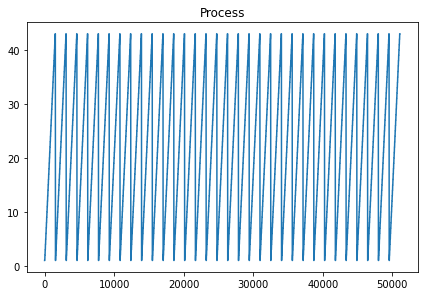

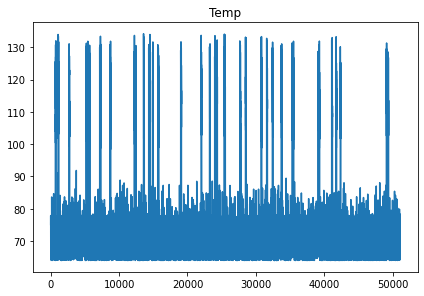

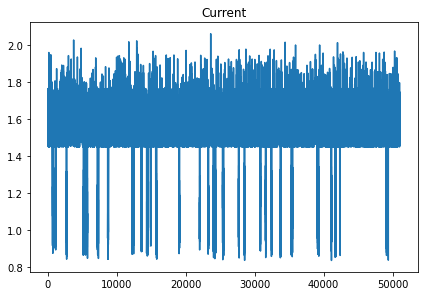

In [15]:
# [단계 2] - 5 데이터 분포 확인
for i in df.columns:
    try:
        df[i].plot()
        plt.tight_layout()
        plt.title(i)
        plt.show()
    except: pass

In [16]:
# [단계 2] - 6 데이터 간의 상관관계
# - 상관분석(Correlation analysis) 두 변수간의 관계를 확인하여 그 관계가 선형 적 혹은 비선형적
# 관계가 있는지를 확인하는 분석
df.columns

Index(['Date', 'Process', 'Time', 'Temp', 'Current'], dtype='object')

In [17]:
pick_data =  df[df.columns[3:]]
pick_data.head()

,Temp,Current
0,75.139142,1.610
1,76.660421,1.530
2,77.177660,1.701
3,76.586434,1.736
4,77.877104,1.748


In [18]:
pick_data.corr()

,Temp,Current
Temp,1.000000,-0.733613
Current,-0.733613,1.000000


In [19]:
!pip install seaborn

In [20]:
# 경고방지
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.style.use('ggplot')

<Figure size 1080x1080 with 0 Axes>

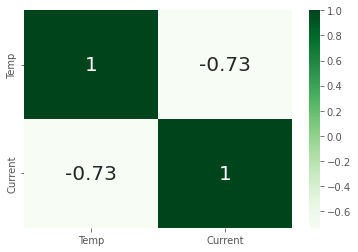

In [21]:
# 상관계수 시각화
import seaborn as sns
sns.heatmap(pick_data.corr(), annot=True, cmap='Greens', annot_kws={'size':20})
plt.show()

In [22]:
# 상관지수를 r 이라고 하면 
# r 값이 +-0.1이면 --> 없다고 할수 있음
# r 값이 +-0.1 ~ +- 0.3이면 --> 약한 양적 상관관계
# r 값이 +-0.3 ~ +- 0.7이면 --> 양적 상관관계
# r 값이 +-0.7 이상 --> 강한 양적 상관관계

In [23]:
# [단계 3] - 데이터 정제(전처리) 
df_er = pd.read_csv(glob.glob(new_path+"/*")[0],index_col=False)
df_er.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,2021-09-06,32.0,33.0,20.0,21.0,22.0,31.0,NaN,NaN,NaN,NaN,NaN
1,2021-09-07,32.0,33.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-09,15.0,16.0,17.0,21.0,22.0,23.0,29.0,30.0,31.0,NaN,NaN
4,2021-09-10,32.0,28.0,29.0,30.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# 결측치 확인
# df_er.isnull().sum()
# df_er[df_er.isnull()]

In [25]:
df_er = df_er.transpose()
df_er

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,2021-09-06,2021-09-07,2021-09-08,2021-09-09,2021-09-10,2021-09-13,2021-09-14,2021-09-15,2021-09-16,2021-09-17,...,2021-10-14,2021-10-15,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-25,2021-10-26,2021-10-27
1,32.0,32.0,NaN,15.0,32.0,27.0,NaN,40.0,2.0,12.0,...,NaN,NaN,11.0,41.0,16.0,NaN,NaN,NaN,32.0,NaN
2,33.0,33.0,NaN,16.0,28.0,28.0,NaN,41.0,35.0,13.0,...,NaN,NaN,12.0,42.0,17.0,NaN,NaN,NaN,33.0,NaN
3,20.0,34.0,NaN,17.0,29.0,29.0,NaN,39.0,3.0,14.0,...,NaN,NaN,13.0,43.0,NaN,NaN,NaN,NaN,37.0,NaN
4,21.0,NaN,NaN,21.0,30.0,NaN,NaN,NaN,34.0,16.0,...,NaN,NaN,15.0,24.0,NaN,NaN,NaN,NaN,38.0,NaN
5,22.0,NaN,NaN,22.0,31.0,NaN,NaN,NaN,36.0,17.0,...,NaN,NaN,16.0,25.0,NaN,NaN,NaN,NaN,39.0,NaN
6,31.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,18.0,...,NaN,NaN,17.0,26.0,NaN,NaN,NaN,NaN,31.0,NaN
7,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_er.columns = df_er.iloc[0,:]
df_er


0,2021-09-06,2021-09-07,2021-09-08,2021-09-09,2021-09-10,2021-09-13,2021-09-14,2021-09-15,2021-09-16,2021-09-17,...,2021-10-14,2021-10-15,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-25,2021-10-26,2021-10-27
0,2021-09-06,2021-09-07,2021-09-08,2021-09-09,2021-09-10,2021-09-13,2021-09-14,2021-09-15,2021-09-16,2021-09-17,...,2021-10-14,2021-10-15,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-25,2021-10-26,2021-10-27
1,32.0,32.0,NaN,15.0,32.0,27.0,NaN,40.0,2.0,12.0,...,NaN,NaN,11.0,41.0,16.0,NaN,NaN,NaN,32.0,NaN
2,33.0,33.0,NaN,16.0,28.0,28.0,NaN,41.0,35.0,13.0,...,NaN,NaN,12.0,42.0,17.0,NaN,NaN,NaN,33.0,NaN
3,20.0,34.0,NaN,17.0,29.0,29.0,NaN,39.0,3.0,14.0,...,NaN,NaN,13.0,43.0,NaN,NaN,NaN,NaN,37.0,NaN
4,21.0,NaN,NaN,21.0,30.0,NaN,NaN,NaN,34.0,16.0,...,NaN,NaN,15.0,24.0,NaN,NaN,NaN,NaN,38.0,NaN
5,22.0,NaN,NaN,22.0,31.0,NaN,NaN,NaN,36.0,17.0,...,NaN,NaN,16.0,25.0,NaN,NaN,NaN,NaN,39.0,NaN
6,31.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,18.0,...,NaN,NaN,17.0,26.0,NaN,NaN,NaN,NaN,31.0,NaN
7,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_er = df_er.iloc[1:,:]
df_er.head()

0,2021-09-06,2021-09-07,2021-09-08,2021-09-09,2021-09-10,2021-09-13,2021-09-14,2021-09-15,2021-09-16,2021-09-17,...,2021-10-14,2021-10-15,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-25,2021-10-26,2021-10-27
1,32.0,32.0,NaN,15.0,32.0,27.0,NaN,40.0,2.0,12.0,...,NaN,NaN,11.0,41.0,16.0,NaN,NaN,NaN,32.0,NaN
2,33.0,33.0,NaN,16.0,28.0,28.0,NaN,41.0,35.0,13.0,...,NaN,NaN,12.0,42.0,17.0,NaN,NaN,NaN,33.0,NaN
3,20.0,34.0,NaN,17.0,29.0,29.0,NaN,39.0,3.0,14.0,...,NaN,NaN,13.0,43.0,NaN,NaN,NaN,NaN,37.0,NaN
4,21.0,NaN,NaN,21.0,30.0,NaN,NaN,NaN,34.0,16.0,...,NaN,NaN,15.0,24.0,NaN,NaN,NaN,NaN,38.0,NaN
5,22.0,NaN,NaN,22.0,31.0,NaN,NaN,NaN,36.0,17.0,...,NaN,NaN,16.0,25.0,NaN,NaN,NaN,NaN,39.0,NaN


In [28]:
# [단계 3]  - 1 데이터 특성을 기반으로 결측치를 수정 혹은 제거
for col in df_er.columns:
    percent = df_er[col].isnull().sum() / df_er[col].shape[0]
    msg = f"column:\t{col}\tPercent of NaN value: {np.round( percent*100, 2)}"
    print(msg)

column:	2021-09-06	Percent of NaN value: 45.45
column:	2021-09-07	Percent of NaN value: 72.73
column:	2021-09-08	Percent of NaN value: 100.0
column:	2021-09-09	Percent of NaN value: 18.18
column:	2021-09-10	Percent of NaN value: 54.55
column:	2021-09-13	Percent of NaN value: 72.73
column:	2021-09-14	Percent of NaN value: 100.0
column:	2021-09-15	Percent of NaN value: 72.73
column:	2021-09-16	Percent of NaN value: 54.55
column:	2021-09-17	Percent of NaN value: 27.27
column:	2021-09-23	Percent of NaN value: 63.64
column:	2021-09-24	Percent of NaN value: 100.0
column:	2021-09-27	Percent of NaN value: 72.73
column:	2021-09-28	Percent of NaN value: 100.0
column:	2021-09-29	Percent of NaN value: 81.82
column:	2021-09-30	Percent of NaN value: 0.0
column:	2021-10-01	Percent of NaN value: 54.55
column:	2021-10-05	Percent of NaN value: 72.73
column:	2021-10-06	Percent of NaN value: 72.73
column:	2021-10-07	Percent of NaN value: 72.73
column:	2021-10-08	Percent of NaN value: 45.45
column:	2021-10

In [29]:
# 결측치를 처리할때 함부로 삭제하지 않는다
#1.  10% 미만인 경우 - 제거, 치환등 모든 방법이 가능
#2.  10% ~ 20% -> 과거 정보로 추정 혹은 예측, 대치
#3.  20% ~ 50% -> 예측아니 대치 방법을 사용
#4.  50% 이상 -> 컬럼(특성) 제거 혹은 데이터 재 수집

In [31]:
# 1
# 2 : 평균과 중앙값 : 빠르게 처리가능하지만.. 값이 유사 혹은 같은 값을 가지기때문에 데이터 세트에 안좋음
# 예측기법을 통해 예측하여 결측된 값을 예측치 값을 결측치를 채우

In [32]:
# [단계 3]  - 2 누락된 값을 채우거나 열 제거
# 너무 많으면... 0으로 대체 -- 거의 제거의 효과

1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
Name: 2021-10-14, dtype: object

In [134]:
df_err = df_er.fillna(0)
df_err.head()

0,2021-09-06,2021-09-07,2021-09-08,2021-09-09,2021-09-10,2021-09-13,2021-09-14,2021-09-15,2021-09-16,2021-09-17,...,2021-10-14,2021-10-15,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-25,2021-10-26,2021-10-27
1,32.0,32.0,0,15.0,32.0,27.0,0,40.0,2.0,12.0,...,0,0,11.0,41.0,16.0,0,0,0,32.0,0
2,33.0,33.0,0,16.0,28.0,28.0,0,41.0,35.0,13.0,...,0,0,12.0,42.0,17.0,0,0,0,33.0,0
3,20.0,34.0,0,17.0,29.0,29.0,0,39.0,3.0,14.0,...,0,0,13.0,43.0,0.0,0,0,0,37.0,0
4,21.0,0.0,0,21.0,30.0,0.0,0,0.0,34.0,16.0,...,0,0,15.0,24.0,0.0,0,0,0,38.0,0
5,22.0,0.0,0,22.0,31.0,0.0,0,0.0,36.0,17.0,...,0,0,16.0,25.0,0.0,0,0,0,39.0,0


In [35]:
# [단계 3]  - 3 무의미한 특성 제거
df.head()

,Date,Process,Time,Temp,Current
0,2021-09-06,1,오후 4:24:03.0,75.139142,1.610
1,2021-09-06,1,오후 4:24:08.0,76.660421,1.530
2,2021-09-06,1,오후 4:24:13.0,77.177660,1.701
3,2021-09-06,1,오후 4:24:18.0,76.586434,1.736
4,2021-09-06,1,오후 4:24:23.0,77.877104,1.748


In [135]:
pick_data = df[df.columns[3:]]
pick_data.head(1)

,Temp,Current
0,75.139142,1.61


In [136]:
# 데이터의 특징을 추출해서 재 가공한다.
# 에러데이터에서 추출한 특징을 정상 데이터 세트에 NG 컬럼을 만들어서 0 과 1로 변경
# 에러 컬럼에서 컬럼명을 뽑아내서 해당 날짜의 데이터만 추출
df[df['Process'] == df_err['2021-09-06'][0]]

,Date,Process,Time,Temp,Current
1116,2021-09-06,32,오후 6:08:15.6,120.673169,0.958032
1117,2021-09-06,32,오후 6:08:20.6,121.721175,1.098960
1118,2021-09-06,32,오후 6:08:25.6,123.522882,1.267960
1119,2021-09-06,32,오후 6:08:30.7,118.620181,1.062032
1120,2021-09-06,32,오후 6:08:35.7,133.402776,1.193891
...,...,...,...,...,...
50683,2021-10-27,32,오후 6:08:01.3,67.119377,1.532000
50684,2021-10-27,32,오후 6:08:06.3,65.121812,1.448000
50685,2021-10-27,32,오후 6:08:11.3,64.061976,1.519000
50686,2021-10-27,32,오후 6:08:16.3,66.086496,1.474000


In [138]:
pick_data['NG'] = 0
for dt in df_err.columns:
    pick_DATE = df[df.Date ==dt]
    for i in range(len(df_err)):# len(df_err) : 11개 -> 한 날짜에 최대 에러 11개
        single_feature = df_err[dt][i]# 에러 루트 위치 검출
        if single_feature != 0 :
            c_inx = pick_DATE['Temp'][pick_DATE['Process'] == single_feature].index
            pick_data['NG'].loc[c_inx] = 1
        else :pass

In [140]:
pick_data['NG'].value_counts()

0    47088
1     3996
Name: NG, dtype: int64

In [74]:
# [단계 4]  - 알고리즘 선택
# 데이터의 특성에 맞게 알고리즘을 선택
# 데이터 시계열이고 일정한 패턴이 있으면 RNN, LSTM, Clustering, Classification등의
# 모델을 사용 할 수있다
# 오토인코더의 특징
    # 비지도 학습, 입력값과 출력값으 유사하게 만드는 것
# 오토인코더 사용하는 이유
 # 데이터중에 이상데이터(여기서는 부정의 데이터) 충분하지 않음 -> 데이터 불균형
 # 이상감지 : Reconstruction Error 라는 것을 사용
 # 입력값과 출력의 차이를 사용해서 스레드(임계값)을 정하고 이 임계값을 넘어서면 이상
 # 데이터라고 정의   
# LSTM-AE : lstm하고 오토인코드를 결합

In [79]:
# [단계 5] 학습, 평가 데이터 준비
# 5-1 데이터 분리
len(df_er.columns)

33

In [84]:
# 33일치의 데이터중에서 10일을 제외하고 추출
(df['Date'] == '2021-09-06').sum()*10

15480

In [85]:
#전체데이터에서 - 15480 을 학습용 데이터로 사용
len(df)

51084

In [87]:
idx =  51084-15480

In [141]:
train_data = pick_data[:35604]
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35604 entries, 0 to 35603
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Temp     35604 non-null  float64
 1   Current  35604 non-null  float64
 2   NG       35604 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 834.6 KB


In [90]:
# 정상인 데이터만 학습을 진행  -  정상데이터만 추출
train_data

,Temp,Current,NG
0,75.139142,1.610,0
1,76.660421,1.530,0
2,77.177660,1.701,0
3,76.586434,1.736,0
4,77.877104,1.748,0
...,...,...,...
35599,67.660421,1.527,0
35600,68.177660,1.519,0
35601,68.586434,1.532,0
35602,65.877104,1.543,0


In [142]:
ng_idx_train = train_data[train_data['NG']== 1].index
ok_idx_train = train_data[train_data['NG']== 0].index
tNc_ok_train = train_data.loc[ok_idx_train]
tNc_ng_train = train_data.loc[ng_idx_train]

In [143]:
# 스케일링
from sklearn.preprocessing import StandardScaler

train = tNc_ok_train
scaler = StandardScaler()
scaler = scaler.fit(train[['Temp']])
train['Temp'] = scaler.transform(train[['Temp']])

In [103]:
# 모델에 사용할 수 있도록 데이터 분리 작업을 진행
# LSTM(samples, timesteps, feature)형태  --> 3차원

In [144]:
TIME_STEP=36
def create_sequences(X, y, time_steps=TIME_STEP):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        Xs.append(X.iloc[i:(i+time_steps)].values)
        ys.append(y.iloc[i:(i+time_steps)].values)
        #     ys.append(y.iloc[i+time_steps])

    return np.array(Xs), np.array(ys)

X_train, Y_train = create_sequences(train[['Temp']], train[['Temp']])

In [145]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=0.2 )
print(len(x_train))
print(len(x_valid))

25833
6459


In [147]:
X_data = pd.DataFrame()
X_data['Temp'] = list(ss_data.reshape(-1))
X_test, Y_test = create_sequences(X_data[['Temp']], test_data[['NG']])

In [148]:
def flatten(X):
   # sample x features array.
    flattened_X = np.empty((X.shape[0 ], X.shape[2 ]))
    for i in range(X.shape[0 ]):
        flattened_X[i] = X[i, (X.shape[1 ]-1 ), :]
    return (flattened_X)

In [149]:
label = flatten(Y_test).reshape(-1)
label.shape

(15444,)

In [150]:
timesteps = X_train.shape[1]
features = X_train.shape[2]

In [151]:
import keras
import tensorflow
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import LSTM

from keras.layers import *
from keras.applications import imagenet_utils
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam

In [152]:
Lstm_AE_3 = Sequential()

# Encoder
Lstm_AE_3.add(LSTM(32,activation='relu', input_shape=(timesteps, features), return_sequences=True))
Lstm_AE_3.add(LSTM(16,activation='relu', return_sequences=False))
Lstm_AE_3.add(RepeatVector(timesteps))

# Decoder
Lstm_AE_3.add(LSTM(32, activation='relu', return_sequences=True))
Lstm_AE_3.add(LSTM(16, activation='relu',return_sequences=True))
Lstm_AE_3.add(TimeDistributed(Dense(features)))
Lstm_AE_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 36, 32)            4352      
                                                                 
 lstm_5 (LSTM)               (None, 16)                3136      
                                                                 
 repeat_vector_3 (RepeatVect  (None, 36, 16)           0         
 or)                                                             
                                                                 
 lstm_6 (LSTM)               (None, 36, 32)            6272      
                                                                 
 lstm_7 (LSTM)               (None, 36, 16)            3136      
                                                                 
 time_distributed (TimeDistr  (None, 36, 1)            17        
 ibuted)                                              

In [154]:
# 단계 7 모델 훈련
# -주의사항 :반드시 정상 데이터만 학습
# GPU 사용 경우
from keras import backend as k
epochs = 200
batch = 128
lr = 0.001

if k.image_data_format() == 'channels_last':
    optimizer = keras.optimizers.Adam(lr)
    Lstm_AE_3.compile(loss='mse', optimizer=optimizer)
    history = Lstm_AE_3.fit(x_train,y_train, epochs=epochs, batch_size=batch,
                            validation_data=(x_valid, y_valid))
else:pass

Epoch 1/200
202/202 [==============================] - 12s 44ms/step - loss: 0.6507 - val_loss: 0.3843
Epoch 2/200
202/202 [==============================] - 9s 44ms/step - loss: 0.4432 - val_loss: 0.4342
Epoch 3/200
202/202 [==============================] - 9s 43ms/step - loss: 0.3908 - val_loss: 0.3668
Epoch 4/200
202/202 [==============================] - 9s 42ms/step - loss: 0.3467 - val_loss: 0.3284
Epoch 5/200
202/202 [==============================] - 8s 42ms/step - loss: 0.3193 - val_loss: 0.3146
Epoch 6/200
202/202 [==============================] - 8s 39ms/step - loss: 0.2998 - val_loss: 0.2957
Epoch 7/200
202/202 [==============================] - 9s 42ms/step - loss: 0.2872 - val_loss: 0.2802
Epoch 8/200
202/202 [==============================] - 8s 42ms/step - loss: 0.2755 - val_loss: 0.2672
Epoch 9/200
202/202 [==============================] - 8s 42ms/step - loss: 0.2658 - val_loss: 0.2602
Epoch 10/200
202/202 [==============================] - 8s 42ms/step - loss: 0.25

In [156]:
Lstm_AE_3.save('Lstm_AE_3.h5')

In [ ]:
# CPU 사용 경우
epochs = 200
batch = 128
lr = 0.001
optimizer = keras.optimizers.Adam(lr)
Lstm_AE_3.compile(loss='mse', optimizer=optimizer)
history = Lstm_AE_3.fit(x_train, y_train,epochs=epochs, batch_size=batch,
               validation_data=(x_valid, y_valid))

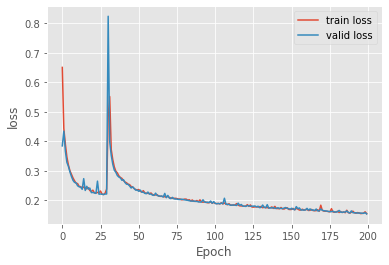

In [157]:
# 학습결과 시각화
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='valid loss')
plt.legend()
plt.xlabel('Epoch'); plt.ylabel('loss')
plt.show()

In [159]:
# 모델평가 및 해석
# 결과를 시각화
prediction =  Lstm_AE_3.predict(X_test)
mse = np.mean(np.power(X_test-prediction,2),axis = 1)
error_df = pd.DataFrame({'reconstruction_error':mse.reshape(-1),'true_class':label})
error_df.describe()
# min max를 확인한다.

483/483 [==============================] - 4s 8ms/step


,reconstruction_error,true_class
count,15444.000000,15444.00000
mean,101.596973,0.04662
std,2731.244256,0.21083
min,0.026612,0.00000
25%,0.091340,0.00000
50%,0.140163,0.00000
75%,0.253722,0.00000
max,172700.457438,1.00000


In [161]:
# 임계치를 이용해서 검증을 진행
thr = np.percentile(mse.reshape(-1),75)  #75%

11583


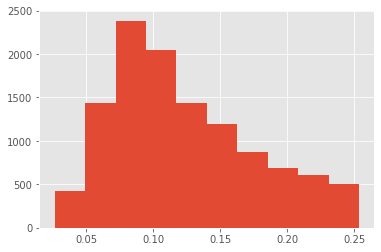

In [163]:
# 임계치를 75%로 제한 했을때 thresholds 보다 작을때(정상)
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['reconstruction_error']<thr]
print(len(fraud_error_df))
ax.hist(fraud_error_df.reconstruction_error.values,bins=10)
plt.show()

3861


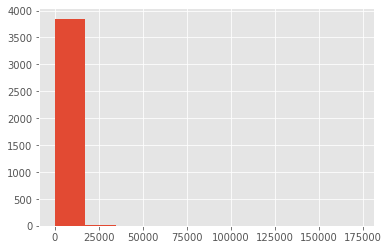

In [170]:
# 임계치를 75%로 제한 했을때 thresholds 보다 작을때(비정상)
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['reconstruction_error']>thr]
print(len(fraud_error_df))
ax.hist(fraud_error_df.reconstruction_error.values,bins=10)
plt.show()

In [167]:
fraud_error_df = error_df[error_df['reconstruction_error']>thr]
fraud_error_df

,reconstruction_error,true_class
57,0.278338,0.0
58,0.810645,0.0
59,2.353030,0.0
60,0.665167,0.0
61,0.379359,0.0
...,...,...
15426,0.635580,0.0
15427,0.463800,0.0
15428,0.340303,0.0
15429,0.308580,0.0


In [ ]:
# confusion matrix
         0        1
0       TN         FP
1       FN         TP

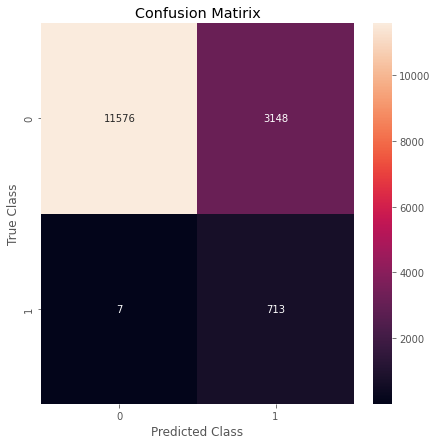

In [176]:
from sklearn.metrics import*
pred_y =  [1 if e>thr else 0 for e in error_df['reconstruction_error'].values]
conf_matrix = confusion_matrix(error_df['true_class'], pred_y)
plt.figure(figsize=(7,7))
sns.heatmap(conf_matrix,annot=True,fmt='d')
plt.title("Confusion Matirix")
plt.xlabel('Predicted Class'); plt.ylabel('True Class')
plt.show()

In [ ]:
# • Recall（재현율) : 출력 결과가 실제 정답 중에서 얼마나 맞혔는가를 나타내는 지표 
# - Recall = TP / (TP + FN)
# • Precision（정밀도) : 출력 결과에서 정답을 얼마나 맞혔는지 나타내는 지표
# - Precision = TP / (TP + FP)
# • Accuracy (정확도）
# - Accuracy = (TP + TN) / (TP + FP + FN + TN)
# • F1-Score (F-점수): 균형 잡힌 성능 평가 지표로 정밀도와 재현율의 상충 관계로 평
# 가에 반영하여, 실제 분류기를 비교할 때 사용하는 지표
# - F1-Score = 2 * (Recall * Precision) / (Recall + Precision)